In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_XnW6LSF.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Lets check the null values in the dataset

<AxesSubplot:>

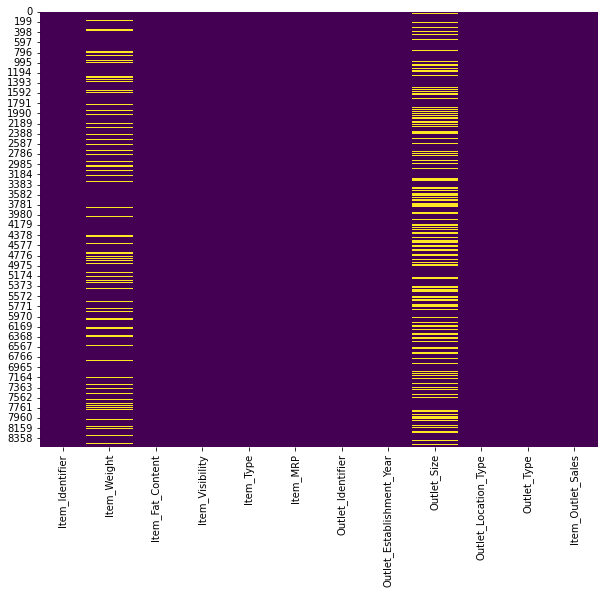

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)

### We can see that Item Weight and Outlet size have null values which we have to look into later

## Lets Split the categorical and numerical columns

In [4]:
categorical_columns=df.select_dtypes(include='object').columns.to_list()
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [5]:
numerical_columns=df.select_dtypes(exclude='object').columns.to_list()
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [6]:
for column in categorical_columns:
    print(f'The number of unique items in {column} is {df[column].nunique()}')

The number of unique items in Item_Identifier is 1559
The number of unique items in Item_Fat_Content is 5
The number of unique items in Item_Type is 16
The number of unique items in Outlet_Identifier is 10
The number of unique items in Outlet_Size is 3
The number of unique items in Outlet_Location_Type is 3
The number of unique items in Outlet_Type is 4


### Lets separate out the number from Item Identifier

In [7]:
df['Item_Identifier']=df['Item_Identifier'].str[:3]

In [8]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### We can see that Low fat is  written as LF low fat and similarly Regular as reg so we will replace them

In [9]:
Item_Fat={'LF':'Low Fat','low fat':'Low Fat','Low Fat':'Low Fat','reg':'Regular','Regular':'Regular'}
df['Item_Fat_Content']=df['Item_Fat_Content'].map(Item_Fat)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


## Lets fill the Missing values

#### Item Weight

In [11]:
Item_Weight_encoded=df.groupby(['Item_Fat_Content','Item_Type'])['Item_Weight'].median().reset_index()
Item_Weight_encoded

,Item_Fat_Content,Item_Type,Item_Weight
0,Low Fat,Baking Goods,12.300
1,Low Fat,Breads,12.600
2,Low Fat,Breakfast,8.895
3,Low Fat,Canned,11.100
4,Low Fat,Dairy,13.350
5,Low Fat,Frozen Foods,12.850
6,Low Fat,Fruits and Vegetables,12.500
7,Low Fat,Hard Drinks,10.100
8,Low Fat,Health and Hygiene,12.150
9,Low Fat,Household,13.150


In [12]:
Null_index=df[df['Item_Weight'].isna()].index

In [13]:
Null_index

Int64Index([   7,   18,   21,   23,   29,   36,   38,   39,   49,   59,
            ...
            8458, 8463, 8469, 8472, 8480, 8485, 8487, 8488, 8490, 8504],
           dtype='int64', length=1463)

In [14]:
for row in Null_index:
    for index in range(len(Item_Weight_encoded)):
        if (df['Item_Fat_Content'][row]==Item_Weight_encoded['Item_Fat_Content'][index] and df['Item_Type'][row]==Item_Weight_encoded['Item_Type'][index]):
            df['Item_Weight'][row]=Item_Weight_encoded['Item_Weight'][index]

<AxesSubplot:>

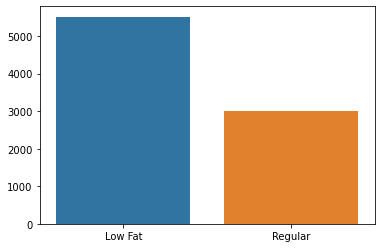

In [15]:
sns.barplot(data=df,x=df['Item_Fat_Content'].value_counts().index,y=df['Item_Fat_Content'].value_counts().values)

In [16]:
df[df['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


#### Outlet Size

In [17]:
Outlet_Size_encoded=df.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].first().reset_index()
Outlet_Size_encoded['Outlet_Size'][3]= 'Small'
Outlet_Size_encoded

,Outlet_Location_Type,Outlet_Type,Outlet_Size
0,Tier 1,Grocery Store,Small
1,Tier 1,Supermarket Type1,Medium
2,Tier 2,Supermarket Type1,Small
3,Tier 3,Grocery Store,Small
4,Tier 3,Supermarket Type1,High
5,Tier 3,Supermarket Type2,Medium
6,Tier 3,Supermarket Type3,Medium


In [18]:
Outlet_nan=df[df['Outlet_Size'].isna()].index
Outlet_nan

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            8493, 8494, 8496, 8500, 8501, 8502, 8508, 8509, 8514, 8519],
           dtype='int64', length=2410)

In [19]:
for item in Outlet_nan:
    for value in range(len(Outlet_Size_encoded)):
        if (df['Outlet_Location_Type'][item]==Outlet_Size_encoded['Outlet_Location_Type'][value] and df['Outlet_Type'][item]==Outlet_Size_encoded['Outlet_Type'][value]):
            df['Outlet_Size'][item]=Outlet_Size_encoded['Outlet_Size'][value]

In [20]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Lets encode the categorical columns

In [21]:
median_encoded_columns=[]
for column in (categorical_columns[:4] + ['Outlet_Establishment_Year']):
    median_=df.groupby(column)['Item_Outlet_Sales'].median().sort_values(ascending=True).index
    median_encoded={k:i for i,k in enumerate(median_,1)}
    encoded_dict={column:median_encoded}
    median_encoded_columns.append(encoded_dict)
    df[column+'_Enc']=df[column].map(median_encoded)
    df.drop(column,axis=1,inplace=True)

In [22]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
Minmax=MinMaxScaler()
standard=StandardScaler()
onehot=OneHotEncoder(drop='first',sparse=False)

In [23]:
onehot_encoded_columns=[]
for column in categorical_columns[4:]:
    one_hot_enc=onehot.fit_transform(df[[column]])
    df[onehot.get_feature_names_out()]=one_hot_enc
    df.drop(column,axis=1,inplace=True)

In [24]:
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_Enc,Item_Fat_Content_Enc,Item_Type_Enc,Outlet_Identifier_Enc,Outlet_Establishment_Year_Enc,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,42,1,4,6,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920,0.019278,48.2692,443.4228,34,2,1,3,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,17.500,0.016760,141.6180,2097.2700,58,1,9,6,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200,0.000000,182.0950,732.3800,51,2,10,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,8.930,0.000000,53.8614,994.7052,2,1,15,8,8,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,61,1,13,8,8,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8519,8.380,0.046982,108.1570,549.2850,29,2,3,4,3,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8520,10.600,0.035186,85.1224,1193.1136,33,1,5,9,9,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8521,7.210,0.145221,103.1332,1845.5976,58,2,13,3,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Numerical columns

In [25]:
from sklearn.preprocessing import RobustScaler
Robust=RobustScaler()
def plot_transform(y):
    fig,axes=plt.subplots(2,5,figsize=(20,10))
    plt.suptitle(f'plot for {column}')
    sns.axisgrid
    sns.distplot(ax=axes[0,0],a=y,axlabel='normal')
    sns.distplot(ax=axes[0,1],a=1/(0.01+y),axlabel='reciprocal')
    sns.distplot(ax=axes[0,2],a=np.sqrt(y),axlabel='squareroot')
    sns.distplot(ax=axes[0,3],a=(y**(1/3)),axlabel='cuberoot')
    sns.distplot(ax=axes[0,4],a=(y**(1/4)),axlabel='quadroot')
    sns.distplot(ax=axes[1,0],a=np.log1p(y),axlabel='logarithmic')
    sns.distplot(ax=axes[1,1],a=Minmax.fit_transform([y]),axlabel='Minmax')
    sns.distplot(ax=axes[1,2],a=standard.fit_transform([y]),axlabel='Standard Scaler')
    sns.distplot(ax=axes[1,3],a=Robust.fit_transform([y]),axlabel='Robustscaler')

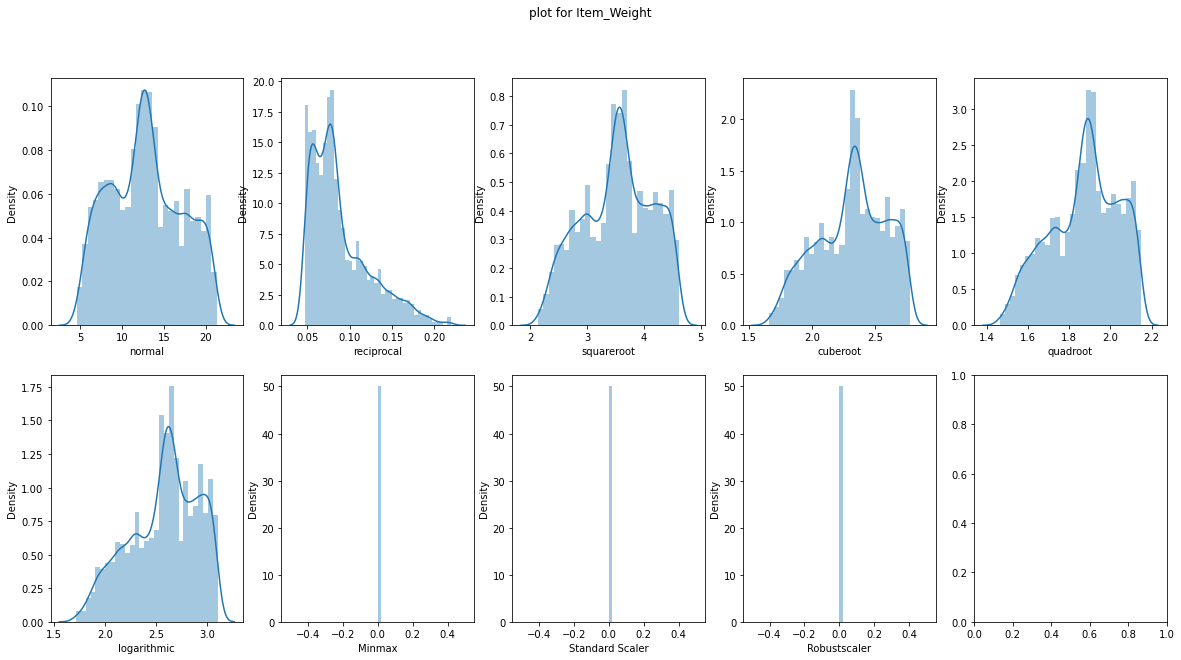

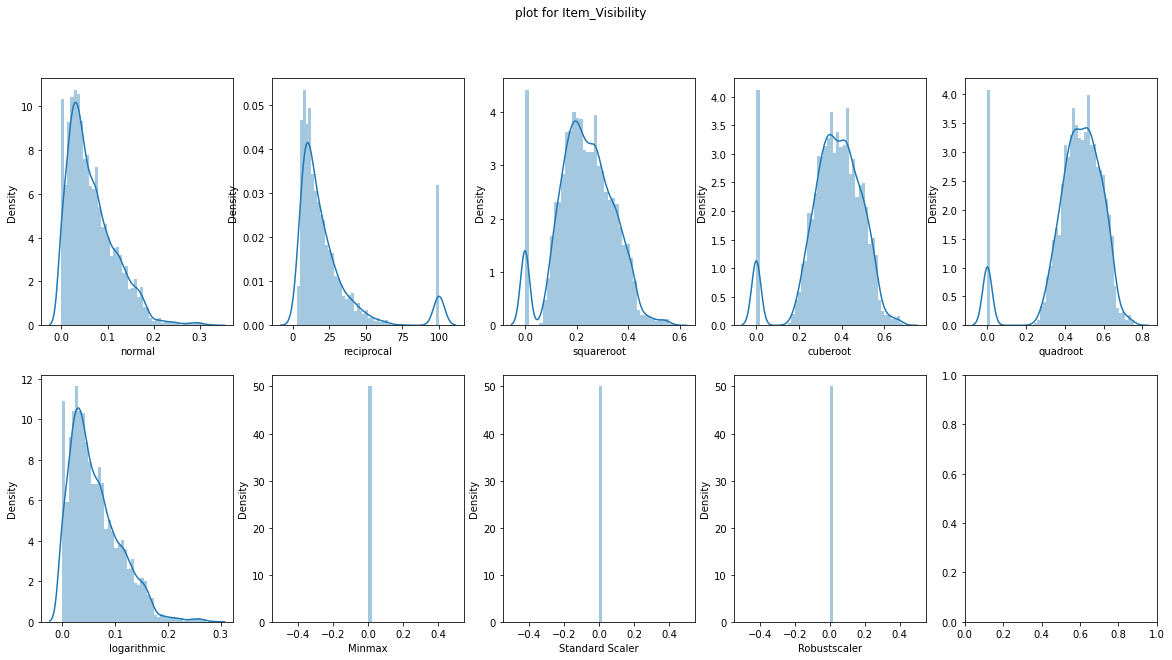

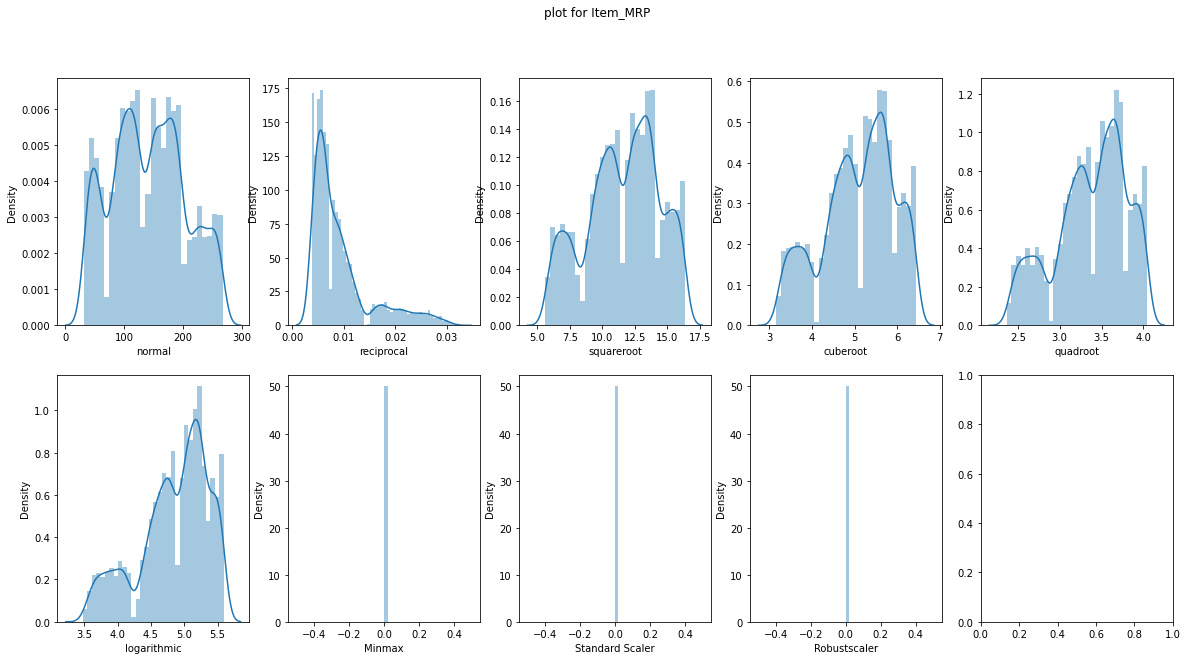

In [26]:
for column in df.columns[:3]:
    plot_transform(df[column])

### We can see that Item visiblity is skewed and cuberoot is a better transformation

In [27]:
df['Item_Visibility']=df['Item_Visibility']**(1/3)
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_Enc,Item_Fat_Content_Enc,Item_Type_Enc,Outlet_Identifier_Enc,Outlet_Establishment_Year_Enc,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.252232,249.8092,3735.1380,42,1,4,6,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.920,0.268136,48.2692,443.4228,34,2,1,3,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,17.500,0.255913,141.6180,2097.2700,58,1,9,6,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.200,0.000000,182.0950,732.3800,51,2,10,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,8.930,0.000000,53.8614,994.7052,2,1,15,8,8,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.384362,214.5218,2778.3834,61,1,13,8,8,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8519,8.380,0.360838,108.1570,549.2850,29,2,3,4,3,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8520,10.600,0.327686,85.1224,1193.1136,33,1,5,9,9,0.0,1.0,1.0,0.0,1.0,0.0,0.0
8521,7.210,0.525625,103.1332,1845.5976,58,2,13,3,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Lets remove columns having high correlation

In [28]:
high_corr_columns=[]
threshold=0.6
for column1 in df.drop('Item_Outlet_Sales',axis=1).columns:
    for column2 in df.drop('Item_Outlet_Sales',axis=1).columns:
        if (column1!=column2) and (np.abs(df[[column1,column2]].corr().values[0][1])>threshold):
            print(f'THe correlation between {column1} and {column2} is \t{np.abs(df[[column1,column2]].corr().values[0][1])}')
            high_corr_columns.append(column2)
list(set(high_corr_columns))

THe correlation between Outlet_Identifier_Enc and Outlet_Establishment_Year_Enc is 	0.7152677887799195
THe correlation between Outlet_Establishment_Year_Enc and Outlet_Identifier_Enc is 	0.7152677887799195
THe correlation between Outlet_Establishment_Year_Enc and Outlet_Type_Supermarket Type1 is 	0.6915766200016253
THe correlation between Outlet_Size_Medium and Outlet_Size_Small is 	0.7923647378506334
THe correlation between Outlet_Size_Small and Outlet_Size_Medium is 	0.7923647378506335
THe correlation between Outlet_Size_Small and Outlet_Location_Type_Tier 2 is 	0.6138543595611985
THe correlation between Outlet_Size_Small and Outlet_Location_Type_Tier 3 is 	0.6445288608565662
THe correlation between Outlet_Location_Type_Tier 2 and Outlet_Size_Small is 	0.6138543595611984
THe correlation between Outlet_Location_Type_Tier 3 and Outlet_Size_Small is 	0.6445288608565662
THe correlation between Outlet_Location_Type_Tier 3 and Outlet_Type_Supermarket Type1 is 	0.6364646570857867
THe correl

['Outlet_Establishment_Year_Enc',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Size_Medium',
 'Outlet_Identifier_Enc',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Location_Type_Tier 3']

In [29]:
df.drop(['Outlet_Type_Supermarket Type1','Outlet_Location_Type_Tier 3','Outlet_Size_Small','Outlet_Establishment_Year_Enc'],axis=1,inplace=True)

<AxesSubplot:>

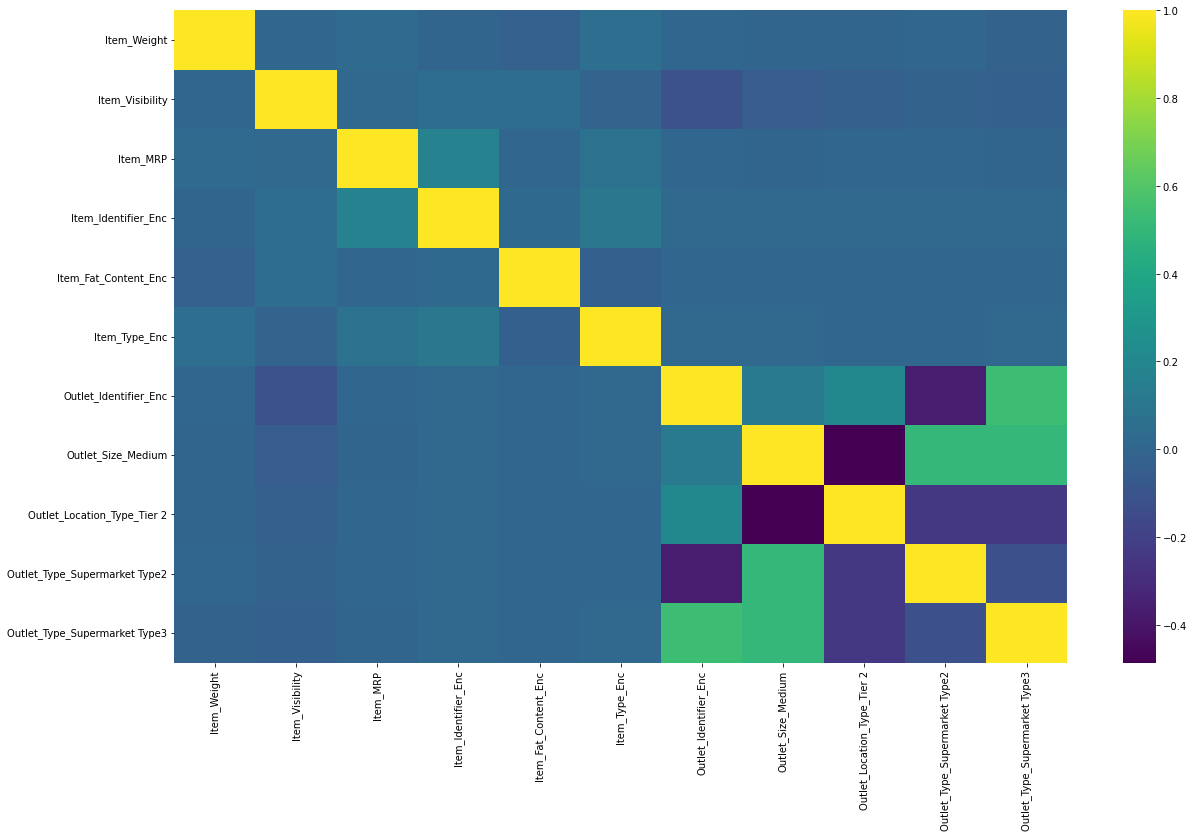

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df.drop('Item_Outlet_Sales',axis=1).corr(),cmap='viridis')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

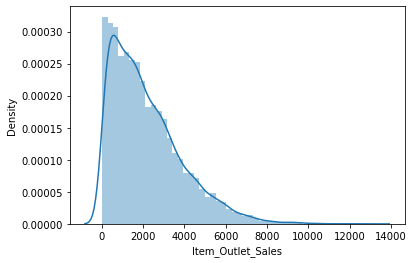

In [31]:
sns.distplot(df['Item_Outlet_Sales'])

### We can also see our target is skewed data we will transfrom it for now and then transform it back once we are predicting

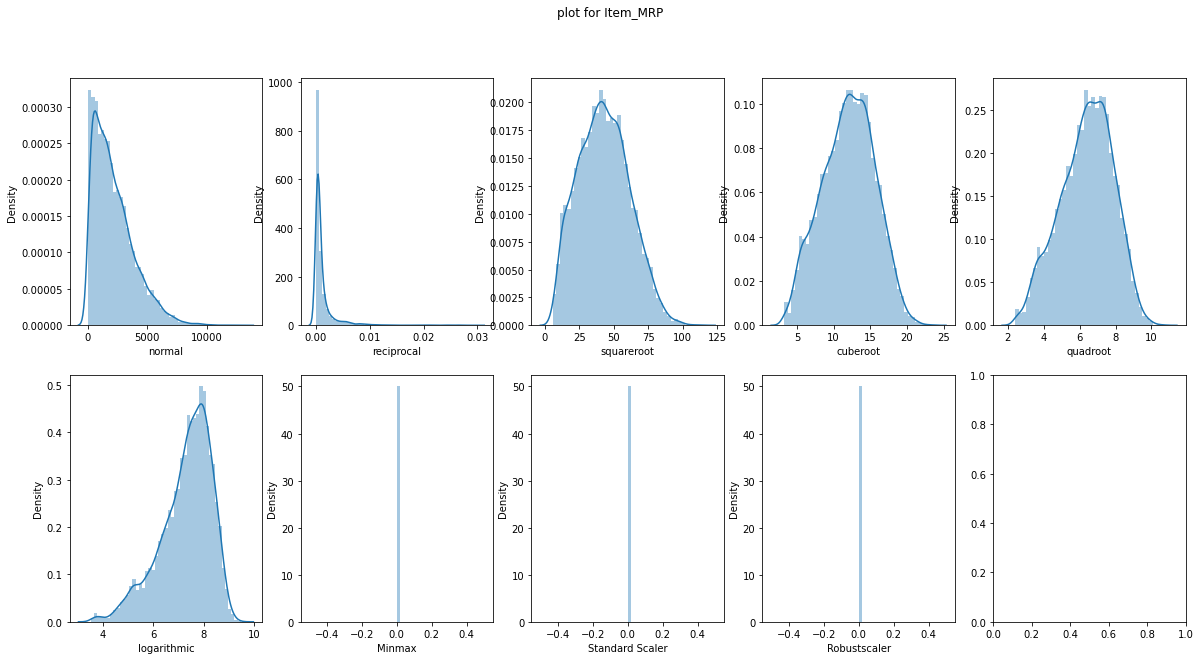

In [32]:
y=df['Item_Outlet_Sales']
plot_transform(y)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

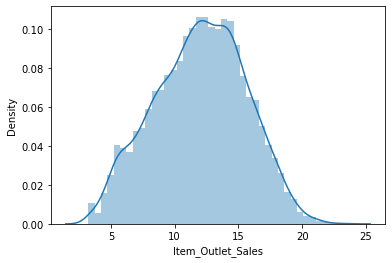

In [33]:
sns.distplot((df['Item_Outlet_Sales']**(1/3)))

## We see that cuberoot is a better transformation

In [34]:
X=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

In [35]:
y=(y**(1/3))
y

0       15.515611
1        7.625576
2       12.800240
3        9.013888
4        9.982319
          ...    
8518    14.058233
8519     8.189661
8520    10.606219
8521    12.266265
8522     9.148444
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Lets standardize the data

In [36]:
for column in X.columns:
    X[column]=standard.fit_transform(X[[column]])

In [37]:
X

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_Enc,Item_Fat_Content_Enc,Item_Type_Enc,Outlet_Identifier_Enc,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.823871,-0.852220,1.747454,0.259370,-0.738147,-1.116056,0.049094,1.432326,-0.696678,-0.349551,-0.351028
1,-1.618033,-0.732787,-1.489023,-0.205251,1.354743,-1.813496,-1.053006,1.432326,-0.696678,2.860816,-0.351028
2,1.102793,-0.824581,0.010040,1.188613,-0.738147,0.046343,0.049094,1.432326,-0.696678,-0.349551,-0.351028
3,1.502223,-2.746391,0.660050,0.782069,1.354743,0.278823,-1.787740,-0.698165,-0.696678,-0.349551,-0.351028
4,-0.910806,-2.746391,-1.399220,-2.063738,-0.738147,1.441223,0.783828,-0.698165,-0.696678,-0.349551,-0.351028
...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.395997,0.140025,1.180783,1.362846,-0.738147,0.976263,0.783828,-0.698165,-0.696678,-0.349551,-0.351028
8519,-1.040034,-0.036634,-0.527301,-0.495640,1.354743,-1.348536,-0.685639,-0.698165,1.435383,-0.349551,-0.351028
8520,-0.518424,-0.285591,-0.897208,-0.263329,-0.738147,-0.883576,1.151195,-0.698165,1.435383,-0.349551,-0.351028
8521,-1.314936,1.200859,-0.607977,1.188613,1.354743,0.976263,-1.053006,1.432326,-0.696678,2.860816,-0.351028


## Lets check the important features to consider for prediction

Text(0.5, 0, 'No of Components')

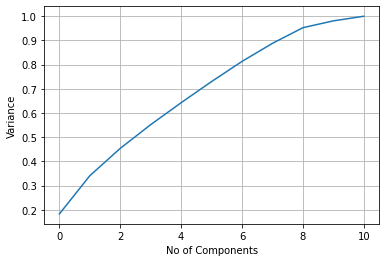

In [38]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.ylabel('Variance')
plt.xlabel('No of Components')

In [39]:
from sklearn.feature_selection import f_regression,SelectKBest
Selector=SelectKBest(score_func=f_regression,k=8)
Selector.fit(X,y)
X_new=Selector.fit_transform(X,y)
X_new=pd.DataFrame(X_new,columns=X.columns[Selector.get_support()])

In [40]:
pca=PCA(n_components=8,random_state=42)
pca.fit(X)
X_pca=pd.DataFrame()
X_pca[pca.get_feature_names_out()]=pca.transform(X)

## Lets build the model 

In [41]:
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_log_error

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3,random_state=42)

In [43]:
linear=LinearRegression()
linear_model=linear.fit(X_train,y_train)
linear_pred=linear_model.predict(X_test)
print('The accuracy for Linear Regression :',r2_score(y_test,linear_pred))

The accuracy for Linear Regression : 0.5967487938534308


In [44]:
linear_pred=cross_val_predict(linear,X_train,y_train,cv=5,verbose=5)
r2_score(y_train,linear_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


0.5804905597050385

### Adaboost

In [45]:
params={'learning_rate': [(0.1 + x / 10) for x in range(0, 8)],
 'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],}
adaboost=RandomizedSearchCV(AdaBoostRegressor(),param_distributions=params,n_iter=10,cv=5,n_jobs=-1,verbose=2,random_state=42)
adaboost_model=adaboost.fit(X_train,y_train)
print(adaboost_model.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
AdaBoostRegressor(learning_rate=0.7, n_estimators=9)


In [46]:
adaboost=AdaBoostRegressor(learning_rate=0.79, n_estimators=12,random_state=42)
adaboost_model=adaboost.fit(X_train,y_train)
adaboost_pred=adaboost_model.predict(X_test)
print('The Train accuracy for ADABOOST :',r2_score(y_train,adaboost_model.predict(X_train)))
print('The Test accuracy for ADABOOST :',r2_score(y_test,adaboost_pred))

The Train accuracy for ADABOOST : 0.6556696898531955
The Test accuracy for ADABOOST : 0.6637052768112797


### DecisionTree

In [47]:
decision=DecisionTreeRegressor()
params={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
decision_model=RandomizedSearchCV(decision,param_distributions=params,cv=5,verbose=2,n_jobs=-1,scoring='r2',n_iter=10)
decision_model=decision_model.fit(X_train,y_train)
print(decision_model.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=50,
                      min_samples_leaf=8, min_weight_fraction_leaf=0.1)


In [48]:
decision_model=DecisionTreeRegressor(max_depth=4, max_features='auto', max_leaf_nodes=60,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1)
decision_model=decision_model.fit(X_train,y_train)
decision_pred=decision_model.predict(X_test)
print('The Train accuracy for Decision Tree Regressor :',r2_score(y_train,decision_model.predict(X_train)))
print('The Test accuracy for Decision Tree Regressor :',r2_score(y_test,decision_pred))

The Train accuracy for Decision Tree Regressor : 0.6362129664881035
The Test accuracy for Decision Tree Regressor : 0.6399492105028747


### XGBOOST

In [49]:
from xgboost import XGBRegressor
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
}
xgboost_=RandomizedSearchCV(XGBRegressor(),param_distributions=params,n_jobs=-1,n_iter=10,cv=10,verbose=5,random_state=42)
xgboost_model=xgboost_.fit(X_train,y_train)
print(xgboost_model.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [69]:
xgboost_=XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
             missing=np.nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1)
xgboost_model=xgboost_.fit(X_train,y_train)
xgboost_pred=xgboost_model.predict(X_test)
print('The Train accuracy for XGBOOST :',r2_score(y_train,xgboost_model.predict(X_train)))
print('The Test accuracy for XGBOOST :',r2_score(y_test,xgboost_pred))

The Train accuracy for XGBOOST : 0.7437667312814227
The Test accuracy for XGBOOST : 0.7008863632804172


### Neural Networks

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.metrics import Accuracy,RootMeanSquaredError

In [65]:
regressor=Sequential()
regressor.add(Dense(units=8,activation='relu'))
regressor.add(Dense(units=10,activation='relu'))
regressor.add(Dense(units=12,activation='relu'))
regressor.add(Dense(units=10,activation='relu'))
regressor.add(Dense(units=8,activation='relu'))
regressor.add(Dense(units=6,activation='relu'))
regressor.add(Dense(units=4,activation='relu'))
regressor.add(Dense(units=2,activation='relu'))
regressor.add(Dense(units=1,activation='linear'))

In [66]:
msle=MeanSquaredLogarithmicError()
regressor.compile(optimizer='adam',loss=msle,metrics=RootMeanSquaredError())

In [67]:
model_history=regressor.fit(X_train,y_train,validation_split=0.2,batch_size=20,epochs=20)

Epoch 1/20
239/239 [==============================] - 2s 3ms/step - loss: 3.0886 - root_mean_squared_error: 10.0244 - val_loss: 0.1157 - val_root_mean_squared_error: 4.1038
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0803 - root_mean_squared_error: 3.3698 - val_loss: 0.0644 - val_root_mean_squared_error: 3.0858
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0543 - root_mean_squared_error: 2.7713 - val_loss: 0.0498 - val_root_mean_squared_error: 2.7409
Epoch 4/20
239/239 [==============================] - 1s 2ms/step - loss: 0.0463 - root_mean_squared_error: 2.5730 - val_loss: 0.0430 - val_root_mean_squared_error: 2.5595
Epoch 5/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0423 - root_mean_squared_error: 2.4675 - val_loss: 0.0392 - val_root_mean_squared_error: 2.4517
Epoch 6/20
239/239 [==============================] - 1s 3ms/step - loss: 0.0395 - root_mean_squared_error: 2.3965 - val_loss: 0.0367 - val

In [68]:
regressor_pred=regressor.predict(X_test)
print('The Train accuracy for ANN :',r2_score(y_train,regressor.predict(X_train))*100)
print('The Test accuracy for ANN :',r2_score(y_test,regressor_pred)*100)

187/187 [==============================] - 0s 1ms/step
The Train accuracy for ANN : 65.27380721008832
The Test accuracy for ANN : 65.63606015108967


In [70]:
prediction_df=pd.DataFrame()
prediction_df['y_true']=y_test**3
prediction_df['ANN_pred']=regressor_pred**3
prediction_df['XGBOOST_pred']=xgboost_pred**3
prediction_df['ANN_error']=(np.abs(prediction_df['y_true']-prediction_df['ANN_pred']))
prediction_df['XGBOOST_error']=(np.abs(prediction_df['y_true']-prediction_df['XGBOOST_pred']))
prediction_df

,y_true,ANN_pred,XGBOOST_pred,ANN_error,XGBOOST_error
7503,1743.0644,1460.956055,1170.407104,282.108345,572.657296
2957,356.8688,542.263611,700.640259,185.394811,343.771459
7031,377.5086,665.545227,613.935486,288.036627,236.426886
1084,5778.4782,3835.676514,4163.588379,1942.801686,1614.889821
856,2356.9320,3070.747314,2793.421387,713.815314,436.489387
...,...,...,...,...,...
443,2133.2232,1818.024780,2045.267822,315.198420,87.955378
777,4287.7520,2969.172119,3345.017334,1318.579881,942.734666
1119,767.0016,397.131439,513.878235,369.870161,253.123365
3209,642.4970,2015.700928,2018.243408,1373.203928,1375.746408


### Lets Import the test data and apply all transformations and run the model

In [57]:
test_df=pd.read_csv('test_FewQE9B.csv')
def test_model(df):
    df['Item_Identifier']=df['Item_Identifier'].str[:3]
    Item_Fat={'LF':'Low Fat','low fat':'Low Fat','Low Fat':'Low Fat','reg':'Regular','Regular':'Regular'}
    df['Item_Fat_Content']=df['Item_Fat_Content'].map(Item_Fat)
    
    Item_Weight_encoded=df.groupby(['Item_Fat_Content','Item_Type'])['Item_Weight'].median().reset_index()
    Null_index=df[df['Item_Weight'].isna()].index
    for row in Null_index:
        for index in range(len(Item_Weight_encoded)):
            if (df['Item_Fat_Content'][row]==Item_Weight_encoded['Item_Fat_Content'][index] and df['Item_Type'][row]==Item_Weight_encoded['Item_Type'][index]):
                df['Item_Weight'][row]=Item_Weight_encoded['Item_Weight'][index]
    
    Outlet_Size_encoded=df.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].first().reset_index()
    Outlet_Size_encoded['Outlet_Size'][3]= 'Small'
    Outlet_nan=df[df['Outlet_Size'].isna()].index
    for item in Outlet_nan:
        for value in range(len(Outlet_Size_encoded)):
            if (df['Outlet_Location_Type'][item]==Outlet_Size_encoded['Outlet_Location_Type'][value] and df['Outlet_Type'][item]==Outlet_Size_encoded['Outlet_Type'][value]):
                df['Outlet_Size'][item]=Outlet_Size_encoded['Outlet_Size'][value]
    
    for column in (categorical_columns[:4] + ['Outlet_Establishment_Year']):
        for column2 in median_encoded_columns:
            for key,values in column2.items():
                if column==key:
                    test_df[column+'_Enc']=test_df[column].map(values)
                    test_df.drop(column,axis=1,inplace=True)
    
    for column in categorical_columns[4:]:
        one_hot_enc=onehot.fit_transform(df[[column]])
        df[onehot.get_feature_names_out()]=one_hot_enc
        df.drop(column,axis=1,inplace=True)
        
    df['Item_Visibility']=df['Item_Visibility']**(1/3)

    df.drop(['Outlet_Type_Supermarket Type1','Outlet_Location_Type_Tier 3','Outlet_Size_Small','Outlet_Establishment_Year_Enc'],axis=1,inplace=True)
    
    X=df.copy()
    for column in X.columns:
        X[column]=standard.fit_transform(X[[column]])
    return X[X.columns[Selector.get_support()]]

In [58]:
X=test_model(test_df)
X

,Item_Visibility,Item_MRP,Item_Identifier_Enc,Item_Type_Enc,Outlet_Identifier_Enc,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type3
0,-1.272956,-0.536555,-1.137531,0.968487,0.048817,1.432138,-0.696584,-0.351274
1,-0.208509,-0.868937,-1.137531,-1.124934,0.416139,-0.698257,1.435578,-0.351274
2,0.742048,1.629848,-1.311997,-0.427127,-1.787795,-0.698257,-0.696584,-0.351274
3,-0.877595,0.226697,0.025571,0.968487,0.416139,-0.698257,1.435578,-0.351274
4,0.951815,1.508110,0.141882,-1.124934,1.518106,1.432138,-0.696584,2.846782
...,...,...,...,...,...,...,...,...
5676,-0.957852,0.004727,1.130519,0.968487,-0.318505,-0.698257,-0.696584,-0.351274
5677,1.190161,0.455014,0.956054,1.201090,-1.053150,1.432138,-0.696584,-0.351274
5678,0.406006,-0.360485,0.839743,-0.892332,-0.685828,-0.698257,1.435578,-0.351274
5679,-2.753366,1.190844,0.607123,0.735885,0.416139,-0.698257,1.435578,-0.351274


### Lets check the predictions

In [71]:
predictions=xgboost_model.predict(X)
predictions=predictions**3
predictions

array([1539.399  , 1190.6382 ,  480.25726, ..., 1683.136  , 3319.1787 ,
       1346.7096 ], dtype=float32)

### Lets save the submission

In [60]:
submission=pd.read_csv('test_FewQE9B.csv',usecols=['Item_Identifier','Outlet_Identifier'])
submission['Item_Outlet_Sales']=(xgboost_model.predict(X)**3)
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1539.399048
1,FDW14,OUT017,1190.638184
2,NCN55,OUT010,480.257263
3,FDQ58,OUT017,2213.070801
4,FDY38,OUT027,5824.609375
...,...,...,...
5676,FDB58,OUT046,2028.901489
5677,FDD47,OUT018,2538.896484
5678,NCO17,OUT045,1683.135986
5679,FDJ26,OUT017,3319.178711


In [72]:
submission.to_csv('submission3.csv',index=False)